# Tugas 07 - Machine Learning Performance Measure

Nama : Muh.Ikhsan

NIM  : H071191049

Performance Measure (Pengukuran kinerja) digunakan untuk mengevaluasi model yang dibuat apakah sudah bekerja dengan baik atau belum.

Metrics adalah ukuran penilaian kuantitatif yang biasa digunakan untuk menilai, membandingkan, dan melacak kinerja atau produksi. 

Definisi TP, FP, TN, dan FN :
- TP = True Positive – Model memprediksi kelas positif dengan benar, menjadi kelas positif.
- FP = False Positive – Model salah memprediksi kelas negatif, menjadi kelas positif.
- FN = False Negative – Model salah memprediksi kelas positif, menjadi kelas negatif.
- TN = True Negative – Model memprediksi kelas negatif dengan benar, menjadi kelas negatif.

## 1. Klasifikasi

- Klasifikasi merupakan supervised learning (pembelajaran dengan pengawasan), Pembelajaran terawasi adalah metode pembelajaran mesin di mana model dilatih menggunakan data berlabel (y).
- Klasifikasi merupakan proses memprediksi kelas/label/y dari titik data (x) yang diberikan.
- Model yang digunakan untuk klasifikasi akan dilatih terlebih dahulu menggunakan data berlabel kemudian digunakan untuk mengklasifikasikan label data input yang diberikan.
- Kelas/Label dari klasifikasi berupa variabel diskrit.
- Contoh Algoritma klasifikasi ialah Decision Tree, Naive Bayes, Logistic regression, Linear Discriminant Analyst, K-Nearest Neighbor

Berikut Contoh Klasifikasi

In [1]:
# Import Library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Membuat contoh datasets masalah klasifikasi yang memiliki 
- 1000 jumlah sample (baris), 
- 3 kelas/label, 
- 20 attribut atau fitur yang mana terdiri dari 3 fitur informative dan sisanya dapat berupa fitur berlebihan (redundant), fitur duplikat, atau fitur tidak berguna yang diambil secara acak.
- Dengan random state 42 (Random state bilangan bulat yang populer adalah 42 atau 0) 

In [2]:
# Mendefinisikan dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

Membagi dataset menjadi data latih dan data uji, dengan rasio data uji = 40% dan data latih = 60%.

In [3]:
# Membagi dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Membuat dan melatih model klasifikasi, disini menggunakan strategi One-vs-Rest yang mana membagi klasifikasi multi-kelas menjadi satu masalah klasifikasi biner per kelas. kemudian algoritma klasifikasi yang digunakan ialah logistik regresi.

In [4]:
# Mendefiniskan Model
clf = OneVsRestClassifier(LogisticRegression())
# Pemasangan atau melatih Model
clf.fit(X_train, y_train)
# Melakukan prediksi data test menggunakan model yang dibuat
# predict akan mengembalikan kelas dengan probabilitas tertinggi
pred = clf.predict(X_test)
# predict_proba akan akan mengembalikan probilitas tiap kelas terhadap input yang diberikan
pred_prob = clf.predict_proba(X_test)
# predict proba kelas ke 2
y_pred_proba_positive = pred_prob[:,1] 
y_true = y_test

### 1. Accuracy (Akurasi)


- Akurasi dalam masalah klasifikasi adalah jumlah prediksi yang benar yang dibuat oleh model atas semua jenis prediksi yang dibuat.

- Cara menghitung akurasi : 

  $Accuracy = \frac{Jumlah\,Prediksi\,Benar}{Total\,Seluruh\,Prediksi}$

  atau

  ![accuracy](https://miro.medium.com/max/665/1*5XuZ_86Rfce3qyLt7XMlhw.png)

  

- Akurasi baik digunakan ketika target dalam data hampir seimbang, dan tidak baik ketika target dalam data adalah mayoritas dari satu kelas.

Untuk mengukur skor akurasi dari suatu model dapat menggunakan 
```sklearn.metrics.accuracy_score```

- Parameter pertama berupa label sebenarnya (y_true)
- Parameter kedua berupa label hasil prediksi (y_pred)
- Parameter ketiga ialah parameter normalize, nilai defaultnya true, 
  - jika normalize=True maka yang dikembalikan ialah fraksi sample yg diklasifikasikan dengan benar, atau nilai akurasi klasifikasi yang diperoleh berdasarkan persamaan sebelumnya.
  - jika normalize=False maka yang dikembalikan ialah jumlah sample yang diklasifikasikan dengan benar.

Dalam klasifikasi multilabel, fungsi mengembalikan akurasi subset. Jika seluruh rangkaian label yang diprediksi untuk sampel benar-benar cocok dengan rangkaian label yang sebenarnya, maka akurasi subset adalah 1,0; jika tidak, itu adalah 0,0.


In [5]:
# Import Library
from sklearn.metrics import accuracy_score
# Mengembalikan akurasi klasifikasi
CA = accuracy_score(y_true, pred) 
# Mengembalikan jumlah klasifikasi benar
NCCS = accuracy_score(y_true, pred, normalize=False)    

Jadi nilai akurasi dari klasifikasi yang dilakukan ialah

In [6]:
CA

0.6175

Jumlah yang diklasifikasikan dengan benar

In [7]:
NCCS

247

### 2. Precision, Recall, dan F1-Score

#### a. Precision
Presisi adalah berapa banyak / proporsi prediksi yang benar di antara semua prediksi dari kelas tertentu. Dengan kata lain, ini adalah proporsi true positif di antara semua prediksi positif.

$Precision = \frac{TP}{TP+FT}$


#### b. Recall
Recall adalah seberapa relevan proporsi prediksi benar yang dihasilkan. Dengan kata lain, ini adalah proporsi true positif di antara semua contoh yang true.

$Recall = \frac{TP}{FN+TP}$

#### c. F1-Score
F1-Score adalah rata-rata harmonik dari Precision dan Recall. 

$HarmonikMean = \frac{2xy}{x+y}$

Sehingga : 

F1-Score = HarmonicMean(Precision, Recall)

F1-Score = $2\times \frac{Precision\times {Recall}}{Precision+ {Recall}}$

In [8]:
# label
labels = ["label1","label2","label3"]

Fungsi membangun sebuah laporan teks yang menunjukkan metrik klasifikasi utama.
Ringkasan yang diberikan berupa precision, recall, dan f1-score.
Rata-rata yang dikembalikan berupa global_accuracy, macro_average l, weighted_average, dan micro_average.


- Global Accuracy, Global accuracy dapat dihitung dengan menjumlahkan nilai di seluruh kelas untuk mendapatkan jumlah FP, FN, TP, dan TN global untuk pengklasifikasi secara keseluruhan.
- Macro Average, Serupa dengan akurasi global, kita menghitung precision global dan recall skor dari jumlah FP, FN, TP, dan TN di seluruh kelas. Kemudian dapat digunakan menghitung F1-Score global.
-  Micro Average, Cara lain untuk mendapatkan satu indikator kinerja adalah dengan merata-ratakan precision score dan recall score dari masing-masing kelas. Proses ini menghasilkan skor precision dan recall global yang kemudian dapat kita gunakan untuk menghitung skor F1 global. Pada library ini Micro Average hanya ditampilkan untuk multi label



In [9]:
print(classification_report(y_true, pred, target_names=labels))

              precision    recall  f1-score   support

      label1       0.62      0.71      0.66       133
      label2       0.45      0.29      0.36       130
      label3       0.70      0.84      0.76       137

    accuracy                           0.62       400
   macro avg       0.59      0.61      0.59       400
weighted avg       0.59      0.62      0.60       400



### 3. Confusion Matrix

Confusion matrix adalah tabel ringkasan dari jumlah prediksi yang benar dan salah (atau nilai aktual dan prediksi) yang dihasilkan oleh classifier (atau model klasifikasi) untuk tugas klasifikasi biner. 


<img src="https://miro.medium.com/max/863/1*0exdQRxrXQgIBZdPFIxbTw.png" alt="drawing" width="400"/>


Untuk Kasus Multilabel, Tidak seperti klasifikasi biner, tidak ada kelas positif atau negatif di sini. 
Katakanlah, kami memiliki dataset yang memiliki tiga label kelas, yaitu Apple , Orange dan Mango.

<img src="https://miro.medium.com/max/1000/1*yH2SM0DIUQlEiveK42NnBg.png" alt="drawing" width="400"/>

Misal untuk kelas apel memiliki nilai :
- TP = 7
- TN = (2+3+2+1) = 8
- FP = (8+9) = 17
- FN = (1+3) = 4

Untuk menghitung confusion metrix bisa menggunakan library berikut
```
sklearn.metrics.confusion_matrix
```

Berikut menghitung confusion matrix menggunakan sklearn.metrixs.confusion_matrix kemudian dicetak langsung dalam bentuk array

In [10]:
# Import Library
from sklearn.metrics import confusion_matrix
# Menghitung confusion matrix
cm = confusion_matrix(pred, y_true)
cm

array([[ 94,  50,   7],
       [ 31,  38,  15],
       [  8,  42, 115]])

Berikut cara visualisasi confusion matrix dengan seaborn

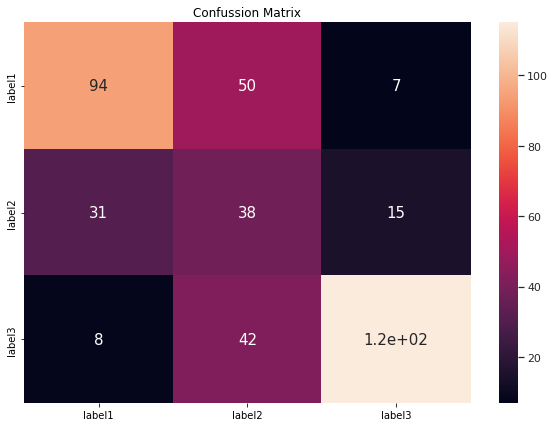

In [11]:
  import seaborn as sns

  #Visualisasi Confussion Matrix
  model_df_cm = pd.DataFrame(cm, labels, labels) 
  plt.figure(figsize = (10,7))
  plt.title('Confussion Matrix') 
  sns.set(font_scale=1) #for label size 
  sns.heatmap(model_df_cm, annot=True, annot_kws={"size": 15}) # font size 
  plt.show()

Berdasarkan confusion matrix diatas maka :

Untuk Label 1
- TP = 94
- TN = (38+15+42+115) = 210
- FP = (50+7) = 57
- FN = (31+8) = 39

Untuk Label 2 
- TP = 38
- TN = (94+7+8+115) = 224
- FP = (31+15) = 46
- FN = (50+42) = 92

Untuk Label 3
- TP = 115
- TN = (94+50+31+38) = 213
- FP = (8+42) = 50
- FN = (7+15) = 22

### 4. ROC-Curve

Roc-Curve dibangun dengan memplot true positive rate (TPR) terhadap false positive rate (FPR) dengan sejumlah nilai ambang batas kandidat yang berbeda antara 0,0 dan 1,0. 
Kurva Roc atau Reciever Receiver operating characteristic dapat dihitung menggunakan library ```sklearn.metrics.roc_curve``` 
dengan parameter berupa:
- y_true : label yang ingin kita lihat roc curvenya
- y_score : skor dari target pada y-true yang dapat berupa probabilitas dari kelas positif, nilai kepercayaan, atau ukuran keputusan
- pos_label : Jika label bukan {-1, 1} atau {0, 1}, maka pos label harus diberikan secara eksplirsit

![roc](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/07/ROC-curve-1-360x296.jpg)

Menghitung roc-curve tiap kelas

In [12]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

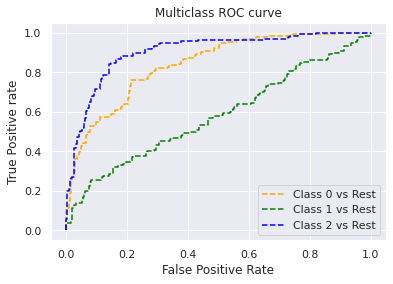

In [13]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Dapat lihat berdasarkan curva roc bahwa pengklasifikasian untuk class 2 menghasilkan skor prediksi paling baik diantara kelas yang lain

## 2. Regresi/Estimasi/Prediksi

- Regresi juga merupakan supervised learning 
- Regresi mirip dengan klasifikasi akan tetapi regresi digunakan untuk memprediksi nilai numerik atau kontinu sedangkan klasifikasi memprediksi nilai diskrit.
- Regresi ialah proses memprediksi nilai kontinu berdasarkan kumpulan data tertentu.
- Contoh penggunaan regresi untuk memprediksi harga suatu mobil.
- Tipe regresi misalnya linear regresi dan logistik regresi

Berikut Contoh regresi

In [14]:
# Impor Library
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Membuat contoh dataframe dengan kamre sebagai x dan harga sebagai y

In [15]:
# Membuat data frame
data = pd.DataFrame([[8, 7], [2, 3], [6, 7], [9, 10], [4, 2], [5, 6], [7, 8], [3, 3]])
# Memberikan nama untuk attribut
data.columns = ['Kamera(x)', 'Harga(y)']
data

,Kamera(x),Harga(y)
0,8,7
1,2,3
2,6,7
3,9,10
4,4,2
5,5,6
6,7,8
7,3,3


Mendefinisikan x dan y

In [16]:
X = data["Kamera(x)"].values[:, np.newaxis] # np.newaxis menambahkan dimensi ke array 
y = data["Harga(y)"].values

Membagi data menjadi data test dan data train dengan ratio data test = 20% data train = 80%

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

Membuat model Linear Regresi berdasarkan data sebelumnya, karena datanya terlalu sedikit maka data latih yang digunakan untuk menfit model adalah data keseluruhan, karena setelah dites performanya ternyata terjadi overfitting

In [18]:
# Mendefinisikan Model
lr = LinearRegression()
# Fit Model
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Melakukan prediksi berdasarkan model

In [19]:
y_pred = lr.predict(X_test)

### 1.MAE

MAE atau Mean Absolute Error, mengambil rata-rata error (kesalahan prediksi) dari setiap sampel dalam kumpulan data dan memberikan output.

Kesalahan Prediksi = Nilai Aktual - Nilai Prediksi.

Kemudian di absolutekan dan dicari rata-ratanya untuk setiap sampel

Sehingga,

$MAE = \frac{\sum_{i=1}^{n}abs(y_i-\hat{y_i})}{n}$

Untuk menghitung MAE dapat langsung menggunakan library ```sklearn.metrics.mean_absolute_error```

In [20]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.821428571428571


### 2.MSE

Mean Squared Error atau MSE dihitung dengan mengambil rata-rata kuadrat selisih antara nilai asli dan nilai prediksi dari data.

Sehingga persamaanya seperti berikut,

$MSE = \sum_{i=1}^{n}{\frac{(y_i-\hat{y_i})^2}{n}}$

MSE dapat diimplementasikan dengan menggunakan metode ```sklearn.metrics.mean_squared_error```,
Dalam sebagian besar masalah regresi , MSE digunakan untuk menentukan kinerja model .



In [21]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.6838151927437635


### 3.RMSE

Root Mean Square Error (RMSE) adalah cara standar untuk mengukur kesalahan suatu model dalam memprediksi data kuantitatif. Seperti namanya RMSE merupakan nilai akar dari MSE.

$RMSE = \sqrt{\sum_{i=1}^{n}{\frac{(y_i-\hat{y_i})^2}{n}}}$


In [22]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.8269311898482022


### 4.RMSLE

Root Mean Squared Log Error (RMSLE), Sepintas seperti hanya menambahkan log pada RMSE namun RMSLE memiliki beberapa kelebihan seperti ketangguhan terhadap outlier, menghasilkan kesalahan relatif perhitungan.

$RMSLE = \sqrt{\sum_{i=1}^{n}{\frac{(log(y_i+1)-log(\hat{y_i+1}))^2}{n}}}$

Berikut Fungsi Untuk Menghitung RMSLE

In [23]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) :
  assert len(y_test) == len(y_pred)
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))

In [24]:
print("Log RMSE",rmsle(y_test, y_pred))

Log RMSE 0.19596298086943523


### 5.R2-Score
R2 atau R-Squared menunjukkan sebearpa cocok data dengan model regresi. Hal ini dapat dilihat dari sebearapa dekat garis regresi dengan nilai data aktual. Nilai R2 terletak antara 0 dan 1, dimana 0 menunjukkan model ini tidak sesuai dengan data yang diberikan dan nilai 1 menunjukkan bajwa model sangat cocok dengan dataset yang diberikan.

R-Square dapat dihitung dengan formula

$R^2 = 1-\frac{SSE}{SST}$

dimana :
- SSE = jumlah kuadrat akibat regresi (Variasi yang bisa dijelaskan)
- $SSE = \sum_{i=1}^{n}(y_i-\hat{y_i})^2$ 
- SST = Total jumlah kuadrat (Variasi Total)
- $SST = \sum_{i=1}^{n}({y_i}-\bar{y_i})^2 $ 

R-Square dapat dihitung dengan method ```sklearn.metrics.r2_score```



In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.8290462018140592


### 6. Adjusted R2-Score

Adjusted R2-Score sama dengan R2 akan tetapi Adjusted R2 menyesuaikan nilai R2 untuk jumlah suku dalam model. 

Jadi Adjusted R2 digunakan karena dalam nilai R2 meningkat seiring penambahan jumlah variabel terlepas dari signifikansi variabel itu.

Forumala : 

$Adj\_R^2=1-(\frac{(1-R^2)\times (n-1)}{n-k-1})$

Dimana :
- k = Jumlah variabel independen dalam model
- n = Jumlah poin dalam kumpulan data.

Berikut code menghitung adjusted R square

In [26]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.8198054559661705


## 3. Clustering

- Clustering atau klasterisasi merupakan unsuversived learning, jadi ketika memprediksi tidak menggunakan label melainkan kesamaan attribut-attribut yang dimiliki
- Clustering adalah proses mengelompokkan data tak berlabel berdasarkan karasteristik dan kesamaannya. 
- Tiga algoritma yang dapat digunakan untuk klasterisasi, diantaranya partition-based clustering, density-based clustering dan hierarchical clustering. 

In [27]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/shraazp/Iris-dataset/master/datasets_19_420_Iris.csv')
#  Tampilkan 5 data pertama
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# hapus atribut yang tidak digunakan
df.drop(['Species','Id'], axis=1, inplace=True)

# tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Normalisasi

In [29]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(150, 4)

In [30]:
df_scale[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [31]:
data = pd.DataFrame(df_scale)
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

data_cluster = data.copy()
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [32]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### 1. Elbow Method

- Dalam algoritma k-means kita perlu menentukan nilai k atau jumlah klaster yang ingin kita gunakan. Salah satu metode terbaik menghitung nilai k dapat menggunakan Metode Elbow.

- Untuk mencari elbow pertama kita plot hasil klasterisasi yang menggunakan beberpa cluster yang berbeda
- Untuk mencari nilai k yang optimal kita harus melihat nilai k pada elbow
- Cara melihat jumlah klaster terbaik berdasarkan elbow method adalah dengan melihat titik dimana distortion/inertia mulai menurun secara linear atau mulai mendatar secara signifikan. Titik inilah yang merupakan "elbow"

Text(0, 0.5, 'Inertia')

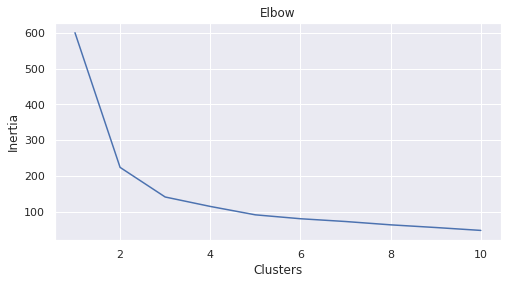

In [33]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Pada plot diatas kemungkinan elbow berada di titik 3, jadi disini untuk pengujian akan digunakan n=3 dan n=4 untuk klastering

In [34]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_kmeans3,cluster_kmeans4
0,-0.900681,1.032057,-1.341272,-1.312977,0,2
1,-1.143017,-0.124958,-1.341272,-1.312977,0,0
2,-1.385353,0.337848,-1.398138,-1.312977,0,0
3,-1.506521,0.106445,-1.284407,-1.312977,0,0
4,-1.021849,1.263460,-1.341272,-1.312977,0,2
...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2,3
146,0.553333,-1.281972,0.705893,0.922064,1,1
147,0.795669,-0.124958,0.819624,1.053537,2,3
148,0.432165,0.800654,0.933356,1.447956,2,3


Menampilkan scatter plot hasil cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


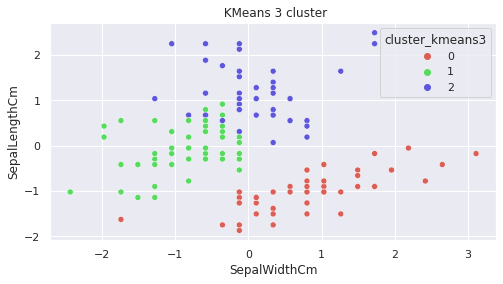

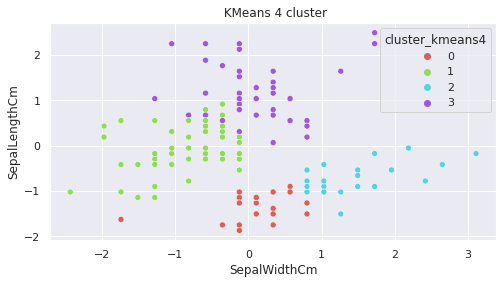

In [35]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['SepalWidthCm'], data_cluster['SepalLengthCm'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

### 2. Silhouette Score

- Silhouette Coefficient atau Silhouette Score adalah metrik yang digunakan untuk menghitung seberapa baik suatu teknik clustering. 
- Selain itu silhouette score juga dapat menggunakan skor siluet untuk memeriksa jumlah cluster yang optimal. 
- Silhouette Score dianggap lebih baik dari pada elbow karena pada elbow kadang cukup membingungkan untuk menentukan titik elbownya sedangkan pada silhouette score memberikan kembalian berupa score yang perbedaannya dapat dilihat jelas
- Nilai silhoette score berkisar dari -1 hingga 1. 
  - 1: Berarti cluster terpisah satu sama lain dan dibedakan dengan jelas.
  - 0: Berarti klaster-klasternya indiferen, atau bisa dikatakan jarak antar klaster tidak signifikan.
  - -1: Berarti cluster ditugaskan dengan cara yang salah.


<img src="https://miro.medium.com/max/700/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg" alt="drawing" width="400"/>



$Silhouette Score = \frac{(b-a)}{max(a,b)}$


Silhouette Score dapat dihitung dengan method ```sklearn.metrics.silhouette_score```

Parameter dari method ini meliputi :
- X, array fitur yang akan diklaster
- labels, label prediksi untuk tiap sample



Berikut akan dicari silhouette score dari model klustering kmeans untuk jumlah cluster 2, 3 dan 4

In [36]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 5):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(data)
    score = silhouette_score(data, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.580184463257396
Silhouette Score for k =  3 is 0.4589717867018717
Silhouette Score for k =  4 is 0.38724679456128813


Berdasarkan silhoette score jumlah kluster 2 memiliki score tertinggi. artinya pada n=2 kluster terpisah dengan cukup baik.

Jika disilhoette score diplot hasilnya seperti berikut

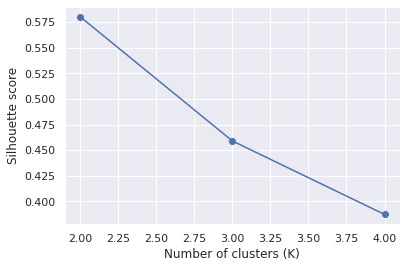

In [37]:
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')